STUDENT : Melis HARMANTEPE

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.io.parsers import read_csv
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

# Normalize

In [4]:
scalar = MinMaxScaler()
scalar.fit_transform(X)

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        0.00711744],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        0.01067616],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.97508897],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.98220641],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        1.        ]])

# Split into test, train validation sets

In [5]:
#Split data into 3 sets: train (%60), test (%20), cross validation (%20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.25,train_size =0.75)

print("Dataset : ",X.shape, y.shape)
print("Training set : ",X_train.shape, y_train.shape)
print("Test set : ", X_test.shape, y_test.shape)
print("Cross validation set : ", X_val.shape, y_val.shape)

Dataset :  (299, 12) (299,)
Training set :  (179, 12) (179,)
Test set :  (60, 12) (60,)
Cross validation set :  (60, 12) (60,)


# Logistic Regression

## Find the best Lambda

In [6]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
length = len(lambdas)
scores = np.zeros(shape=length)

for i,l in enumerate(lambdas):
    LR = LogisticRegression(C=l, max_iter=200)
    LR.fit(X_train, y_train.ravel())
    scores[i] = LR.score(X_val, y_val.ravel())

maxScore = np.amax(scores)
pos = np.argwhere(scores == maxScore)[-1]
l = lambdas[pos[0]]
print("Best value for Lambda: " + repr(l))
print("Score: "+repr(maxScore))

Best value for Lambda: 100
Score: 0.8333333333333334


In [7]:
model = LogisticRegression(C=100, max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

log_acc = model.score(X_test, y_test)
log_f1 = f1_score(y_test, y_pred)
print("Logistic Regression Accuracy (built-in function) : ", log_acc)

Logistic Regression Accuracy (built-in function) :  0.7666666666666667


In [8]:
#ROC
roc_auc_score(y_test, y_pred)

0.7545787545787547

In [9]:
cm_LR = confusion_matrix(y_test, y_pred)
print(cm_LR)

[[31  8]
 [ 6 15]]


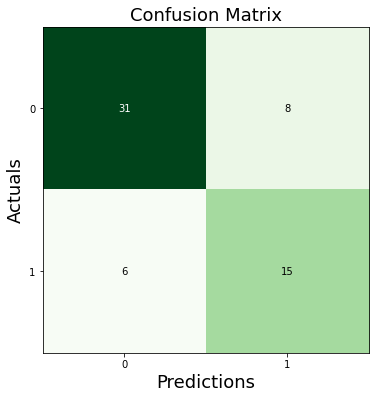

In [10]:
fig, ax = plot_confusion_matrix(conf_mat=cm_LR, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [11]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.65      0.71      0.68        21

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60



# SVM

In [12]:
def gaussian(X, y, c, sigma):
    gamma = 1 / (2 * sigma**2)
    svm = SVC(kernel='rbf', C=c, gamma=gamma)
    svm.fit(X,y)
    return svm

## Find the best C and Sigma(Gamma)

In [13]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigmas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
length = len(Cs)
scores = np.zeros(shape=(length, length))

for i,c in enumerate(Cs):
    for j, sigma in enumerate(sigmas):
        svm = gaussian(X_train, y_train, c=c, sigma=sigma)
        scores[i,j] = accuracy_score(y_val, svm.predict(X_val))
maxScore = np.amax(scores)
pos = np.argwhere(scores == maxScore)[0]
c_def = pos[0]
s_def = pos[1]

c = Cs[pos[0]]
s = sigmas[pos[1]]
print("Best value for C: " + repr(c))
print("Best value for Sigma: " + repr(s))
print("Score: "+repr(maxScore))

Best value for C: 0.01
Best value for Sigma: 0.01
Score: 0.7333333333333333


## RBF

In [14]:
model_svc = SVC(kernel='rbf')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

svc_acc = model_svc.score(X_test, y_test)
svc_f1 = f1_score(y_test, y_pred_svc)
print(f'Support Vector Machine => rbf\nAccuracy = {svc_acc}\nF1_Score = {svc_f1}\n')

Support Vector Machine => rbf
Accuracy = 0.65
F1_Score = 0.0



In [15]:
#ROC
roc_auc_score(y_test, y_pred_svc)

0.5

In [16]:
cm_SVM = confusion_matrix(y_test, y_pred_svc)
print(cm_SVM)

[[39  0]
 [21  0]]


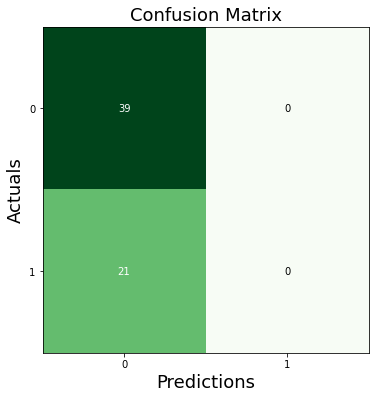

In [17]:
fig, ax = plot_confusion_matrix(conf_mat=cm_SVM, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [18]:
#Classification Report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           1       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



## Linear

In [19]:
model_svc = SVC(kernel='linear', random_state=0)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

svc_acc = model_svc.score(X_test, y_test)
svc_f1 = f1_score(y_test, y_pred_svc)
print(f'Support Vector Machine => linear\nAccuracy = {svc_acc}\nF1_Score = {svc_f1}\n')

Support Vector Machine => linear
Accuracy = 0.75
F1_Score = 0.5161290322580645



In [20]:
#ROC
roc_auc_score(y_test, y_pred_svc)

0.6648351648351648

In [21]:
cm_SVM = confusion_matrix(y_test, y_pred_svc)
print(cm_SVM)

[[37  2]
 [13  8]]


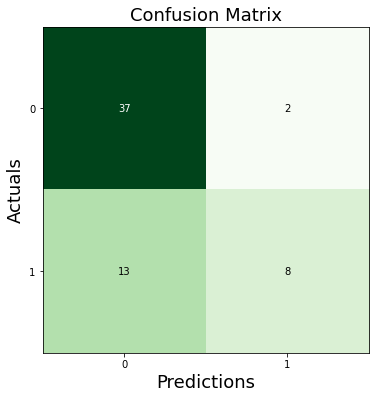

In [22]:
fig, ax = plot_confusion_matrix(conf_mat=cm_SVM, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [23]:
#Classification Report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        39
           1       0.80      0.38      0.52        21

    accuracy                           0.75        60
   macro avg       0.77      0.66      0.67        60
weighted avg       0.76      0.75      0.72        60



# Neural Networks

## Find the best Lambda

In [24]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
length = len(lambdas)
scores = np.zeros(shape=length)

for i,l in enumerate(lambdas):
    NN = MLPClassifier(learning_rate_init=l, max_iter =400)
    NN.fit(X_train, y_train.ravel())
    scores[i] = NN.score(X_val, y_val.ravel())

maxScore = np.amax(scores)
pos = np.argwhere(scores == maxScore)[-1]
l = lambdas[pos[0]]
print("Best value for Lambda: " + repr(l))
print("Score: "+repr(maxScore))

Best value for Lambda: 100
Score: 0.7333333333333333


In [25]:
model_nn = MLPClassifier(alpha=100)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)

nn_acc = model_nn.score(X_test, y_test)
nn_f1 = f1_score(y_test, y_pred_nn)
print("Logistic Regression Accuracy (built-in function) : ", nn_acc)

Logistic Regression Accuracy (built-in function) :  0.65


In [26]:
#ROC
roc_auc_score(y_test, y_pred_nn)

0.5

In [27]:
cm_NN = confusion_matrix(y_test, y_pred_nn)
print(cm_NN)

[[39  0]
 [21  0]]


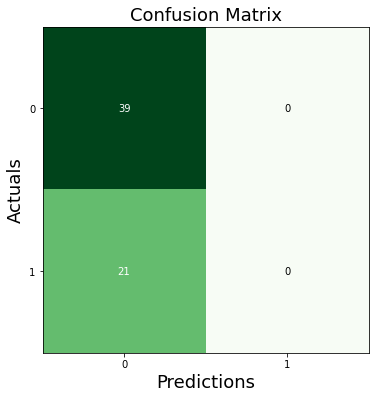

In [28]:
fig, ax = plot_confusion_matrix(conf_mat=cm_NN, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
#Classification Report
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           1       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



# Final Results

In [30]:
print(f'Logistic Regression\nAccuracy = {log_acc}\nF1_Score = {log_f1}\n')
print(f'Support Vector Machine\nAccuracy = {svc_acc}\nF1_Score = {svc_f1}\n')
print(f'Neural Network\nAccuracy = {nn_acc}\nF1_Score = {nn_f1}\n')

Logistic Regression
Accuracy = 0.7666666666666667
F1_Score = 0.6818181818181819

Support Vector Machine
Accuracy = 0.75
F1_Score = 0.5161290322580645

Neural Network
Accuracy = 0.65
F1_Score = 0.0

